In [1]:
"""
    Experimentation with a custom neural network on a datset of MRI covid/non-covid images.
    
    Created: 11/20/2020
    Author(s): Ben Flanders (brf97486)
    
    
    Potential source of getting all layer predictions: https://stackoverflow.com/questions/51677631/keras-tensorflow-get-predictions-or-output-of-all-layers-efficiently

"""

import cv2, random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler


In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 512




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  0.0
filepath:  /home/brf97486/COVID-19-CT-image-analysis-CSCI_8955/data/CT_NonCOVID/1061.png
image dimensions:  (412, 512, 3)
image datatype:  uint8
image max:  255
image min


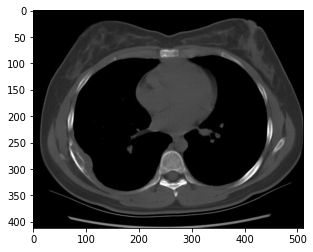

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

train_data = train_data + train_data + train_data + train_data + train_data + train_data # when using the noise adder and random rotation then triple the datasets
random.shuffle(train_data)

In [8]:
# get the image data and load it into memory


train_X = np.asarray([dh.load_image(fp, resize=True, add_noise=True, randomly_rotate=True, grayscale=True) for (fp, label) in train_data]).astype('uint8')
train_y = np.asarray([label for (fp, label) in train_data]).astype('float16')

test_X = np.asarray([dh.load_image(fp, resize=True, add_noise=True, randomly_rotate=True, grayscale=True) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')

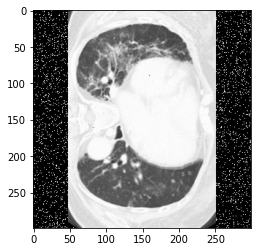

In [9]:
plt.imshow(train_X[0], cmap='gray')

In [10]:
#assert False

In [11]:
i = Input((299,299,3))
x = Conv2D(16, (4,4), strides=(4,4), padding='valid', activation='relu')(i)
x = BatchNormalization()(x)
#x = Conv2D(16, (4,4), strides=(4,4), padding='valid', activation='relu')(x)
#x = BatchNormalization()(x)
#x = Conv2D(32, (3,3), strides=(3,3), padding='valid', activation='relu')(x)
#x = BatchNormalization()(x)

# change filter dim back to 32 for 80% accuracy
x = Conv2D(32, (3,3), strides=(3,3), padding='valid', activation='relu')(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(16, activation='relu', dtype=tf.float32)(x)
x = Dropout(0.5)(x)
prediction = Dense(1, activation='sigmoid', dtype=tf.float32)(x)


model = tf.keras.Model(inputs=i,outputs=prediction)

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy(),)





In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 74, 74, 16)        784       
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)               

In [13]:
model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, validation_data=(test_X, test_y), epochs=1000, )

Epoch 1/1000
7/7 [==============================] - 6s 843ms/step - loss: 0.6891 - binary_accuracy: 0.5316 - val_loss: 2.2318 - val_binary_accuracy: 0.4267
Epoch 2/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.6621 - binary_accuracy: 0.6379 - val_loss: 3.8279 - val_binary_accuracy: 0.4267
Epoch 3/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.6314 - binary_accuracy: 0.6681 - val_loss: 3.8884 - val_binary_accuracy: 0.4267
Epoch 4/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.6037 - binary_accuracy: 0.6862 - val_loss: 5.3027 - val_binary_accuracy: 0.4267
Epoch 5/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.5865 - binary_accuracy: 0.6980 - val_loss: 5.0050 - val_binary_accuracy: 0.4267
Epoch 6/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.5802 - binary_accuracy: 0.6904 - val_loss: 4.9764 - val_binary_accuracy: 0.4267
Epoch 7/1000
7/7 [==============================] - 0s 49ms/step - lo

7/7 [==============================] - 0s 47ms/step - loss: 0.5035 - binary_accuracy: 0.7612 - val_loss: 0.5223 - val_binary_accuracy: 0.7600
Epoch 54/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.4931 - binary_accuracy: 0.7643 - val_loss: 0.5448 - val_binary_accuracy: 0.7333
Epoch 55/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4951 - binary_accuracy: 0.7556 - val_loss: 0.7175 - val_binary_accuracy: 0.6267
Epoch 56/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.5025 - binary_accuracy: 0.7466 - val_loss: 0.5198 - val_binary_accuracy: 0.7667
Epoch 57/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.5057 - binary_accuracy: 0.7520 - val_loss: 0.6348 - val_binary_accuracy: 0.6733
Epoch 58/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.4937 - binary_accuracy: 0.7592 - val_loss: 0.5249 - val_binary_accuracy: 0.7667
Epoch 59/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.49

7/7 [==============================] - 0s 51ms/step - loss: 0.4730 - binary_accuracy: 0.7743 - val_loss: 0.4722 - val_binary_accuracy: 0.8000
Epoch 106/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.4648 - binary_accuracy: 0.7841 - val_loss: 0.4702 - val_binary_accuracy: 0.7800
Epoch 107/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4694 - binary_accuracy: 0.7810 - val_loss: 0.4863 - val_binary_accuracy: 0.7800
Epoch 108/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.4769 - binary_accuracy: 0.7738 - val_loss: 0.5069 - val_binary_accuracy: 0.7467
Epoch 109/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4727 - binary_accuracy: 0.7808 - val_loss: 0.4679 - val_binary_accuracy: 0.8133
Epoch 110/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.4734 - binary_accuracy: 0.7827 - val_loss: 0.4635 - val_binary_accuracy: 0.7867
Epoch 111/1000
7/7 [==============================] - 0s 48ms/step - loss

7/7 [==============================] - 0s 47ms/step - loss: 0.4446 - binary_accuracy: 0.7956 - val_loss: 0.4894 - val_binary_accuracy: 0.7667
Epoch 158/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4546 - binary_accuracy: 0.8001 - val_loss: 0.4654 - val_binary_accuracy: 0.8133
Epoch 159/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4412 - binary_accuracy: 0.7956 - val_loss: 0.4787 - val_binary_accuracy: 0.7933
Epoch 160/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4472 - binary_accuracy: 0.7959 - val_loss: 0.4699 - val_binary_accuracy: 0.8067
Epoch 161/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4476 - binary_accuracy: 0.7998 - val_loss: 0.4860 - val_binary_accuracy: 0.7867
Epoch 162/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4484 - binary_accuracy: 0.7903 - val_loss: 0.4793 - val_binary_accuracy: 0.7933
Epoch 163/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 51ms/step - loss: 0.4365 - binary_accuracy: 0.7894 - val_loss: 0.4639 - val_binary_accuracy: 0.8133
Epoch 210/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4419 - binary_accuracy: 0.7945 - val_loss: 0.4783 - val_binary_accuracy: 0.8067
Epoch 211/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4348 - binary_accuracy: 0.7998 - val_loss: 0.4724 - val_binary_accuracy: 0.8067
Epoch 212/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.4405 - binary_accuracy: 0.7975 - val_loss: 0.4670 - val_binary_accuracy: 0.8200
Epoch 213/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4338 - binary_accuracy: 0.8001 - val_loss: 0.4676 - val_binary_accuracy: 0.8200
Epoch 214/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4383 - binary_accuracy: 0.7953 - val_loss: 0.4712 - val_binary_accuracy: 0.8133
Epoch 215/1000
7/7 [==============================] - 0s 48ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.4178 - binary_accuracy: 0.8003 - val_loss: 0.4723 - val_binary_accuracy: 0.8133
Epoch 262/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4244 - binary_accuracy: 0.8070 - val_loss: 0.4791 - val_binary_accuracy: 0.8133
Epoch 263/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4250 - binary_accuracy: 0.8090 - val_loss: 0.4852 - val_binary_accuracy: 0.7933
Epoch 264/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4132 - binary_accuracy: 0.8093 - val_loss: 0.4665 - val_binary_accuracy: 0.8133
Epoch 265/1000
7/7 [==============================] - 0s 46ms/step - loss: 0.4143 - binary_accuracy: 0.8152 - val_loss: 0.4841 - val_binary_accuracy: 0.7733
Epoch 266/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4168 - binary_accuracy: 0.8079 - val_loss: 0.4848 - val_binary_accuracy: 0.7800
Epoch 267/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 51ms/step - loss: 0.4060 - binary_accuracy: 0.8177 - val_loss: 0.4844 - val_binary_accuracy: 0.8067
Epoch 314/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4060 - binary_accuracy: 0.8087 - val_loss: 0.4884 - val_binary_accuracy: 0.8133
Epoch 315/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4107 - binary_accuracy: 0.8174 - val_loss: 0.5022 - val_binary_accuracy: 0.7867
Epoch 316/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4068 - binary_accuracy: 0.8135 - val_loss: 0.4766 - val_binary_accuracy: 0.7933
Epoch 317/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4148 - binary_accuracy: 0.8098 - val_loss: 0.5242 - val_binary_accuracy: 0.7733
Epoch 318/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.4001 - binary_accuracy: 0.8149 - val_loss: 0.4794 - val_binary_accuracy: 0.8067
Epoch 319/1000
7/7 [==============================] - 0s 51ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.4121 - binary_accuracy: 0.8003 - val_loss: 0.5258 - val_binary_accuracy: 0.7667
Epoch 366/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4101 - binary_accuracy: 0.8084 - val_loss: 0.5218 - val_binary_accuracy: 0.7933
Epoch 367/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4042 - binary_accuracy: 0.8138 - val_loss: 0.5756 - val_binary_accuracy: 0.7400
Epoch 368/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.4073 - binary_accuracy: 0.8112 - val_loss: 0.5369 - val_binary_accuracy: 0.7733
Epoch 369/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.4027 - binary_accuracy: 0.8152 - val_loss: 0.5872 - val_binary_accuracy: 0.7333
Epoch 370/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.4014 - binary_accuracy: 0.8104 - val_loss: 0.4947 - val_binary_accuracy: 0.8067
Epoch 371/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 48ms/step - loss: 0.3828 - binary_accuracy: 0.8333 - val_loss: 0.5156 - val_binary_accuracy: 0.8000
Epoch 418/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3838 - binary_accuracy: 0.8221 - val_loss: 0.5340 - val_binary_accuracy: 0.7933
Epoch 419/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3869 - binary_accuracy: 0.8241 - val_loss: 0.5000 - val_binary_accuracy: 0.8000
Epoch 420/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3872 - binary_accuracy: 0.8205 - val_loss: 0.5142 - val_binary_accuracy: 0.7933
Epoch 421/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3892 - binary_accuracy: 0.8258 - val_loss: 0.5601 - val_binary_accuracy: 0.7600
Epoch 422/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3752 - binary_accuracy: 0.8311 - val_loss: 0.5054 - val_binary_accuracy: 0.7933
Epoch 423/1000
7/7 [==============================] - 0s 48ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3810 - binary_accuracy: 0.8322 - val_loss: 0.5089 - val_binary_accuracy: 0.7800
Epoch 470/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3687 - binary_accuracy: 0.8266 - val_loss: 0.5131 - val_binary_accuracy: 0.8067
Epoch 471/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3822 - binary_accuracy: 0.8261 - val_loss: 0.5385 - val_binary_accuracy: 0.7933
Epoch 472/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3892 - binary_accuracy: 0.8194 - val_loss: 0.5308 - val_binary_accuracy: 0.8000
Epoch 473/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3854 - binary_accuracy: 0.8216 - val_loss: 0.5229 - val_binary_accuracy: 0.7933
Epoch 474/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3767 - binary_accuracy: 0.8333 - val_loss: 0.5406 - val_binary_accuracy: 0.8067
Epoch 475/1000
7/7 [==============================] - 0s 51ms/step - loss

7/7 [==============================] - 0s 51ms/step - loss: 0.3594 - binary_accuracy: 0.8339 - val_loss: 0.5627 - val_binary_accuracy: 0.8000
Epoch 522/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3619 - binary_accuracy: 0.8406 - val_loss: 0.5821 - val_binary_accuracy: 0.8067
Epoch 523/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3655 - binary_accuracy: 0.8305 - val_loss: 0.5314 - val_binary_accuracy: 0.8000
Epoch 524/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3636 - binary_accuracy: 0.8303 - val_loss: 0.5054 - val_binary_accuracy: 0.8000
Epoch 525/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3750 - binary_accuracy: 0.8280 - val_loss: 0.5227 - val_binary_accuracy: 0.7867
Epoch 526/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3646 - binary_accuracy: 0.8345 - val_loss: 0.5869 - val_binary_accuracy: 0.7800
Epoch 527/1000
7/7 [==============================] - 0s 51ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3526 - binary_accuracy: 0.8400 - val_loss: 0.5299 - val_binary_accuracy: 0.7933
Epoch 574/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3654 - binary_accuracy: 0.8437 - val_loss: 0.5233 - val_binary_accuracy: 0.7867
Epoch 575/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3655 - binary_accuracy: 0.8336 - val_loss: 0.5370 - val_binary_accuracy: 0.8000
Epoch 576/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3588 - binary_accuracy: 0.8353 - val_loss: 0.5262 - val_binary_accuracy: 0.8067
Epoch 577/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3598 - binary_accuracy: 0.8431 - val_loss: 0.5725 - val_binary_accuracy: 0.7933
Epoch 578/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3576 - binary_accuracy: 0.8350 - val_loss: 0.5780 - val_binary_accuracy: 0.8000
Epoch 579/1000
7/7 [==============================] - 0s 49ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3438 - binary_accuracy: 0.8456 - val_loss: 0.5835 - val_binary_accuracy: 0.7400
Epoch 626/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3466 - binary_accuracy: 0.8372 - val_loss: 0.5783 - val_binary_accuracy: 0.8000
Epoch 627/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3487 - binary_accuracy: 0.8420 - val_loss: 0.5764 - val_binary_accuracy: 0.8000
Epoch 628/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3514 - binary_accuracy: 0.8431 - val_loss: 0.5664 - val_binary_accuracy: 0.8000
Epoch 629/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3363 - binary_accuracy: 0.8456 - val_loss: 0.5422 - val_binary_accuracy: 0.8133
Epoch 630/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3493 - binary_accuracy: 0.8462 - val_loss: 0.5406 - val_binary_accuracy: 0.8067
Epoch 631/1000
7/7 [==============================] - 0s 49ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3441 - binary_accuracy: 0.8428 - val_loss: 0.5372 - val_binary_accuracy: 0.7867
Epoch 678/1000
7/7 [==============================] - 0s 46ms/step - loss: 0.3412 - binary_accuracy: 0.8437 - val_loss: 0.5414 - val_binary_accuracy: 0.7867
Epoch 679/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3400 - binary_accuracy: 0.8428 - val_loss: 0.5489 - val_binary_accuracy: 0.8000
Epoch 680/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3362 - binary_accuracy: 0.8459 - val_loss: 0.5329 - val_binary_accuracy: 0.7867
Epoch 681/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3403 - binary_accuracy: 0.8392 - val_loss: 0.5323 - val_binary_accuracy: 0.7800
Epoch 682/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3334 - binary_accuracy: 0.8532 - val_loss: 0.5640 - val_binary_accuracy: 0.8133
Epoch 683/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3362 - binary_accuracy: 0.8468 - val_loss: 0.5663 - val_binary_accuracy: 0.7867
Epoch 730/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3261 - binary_accuracy: 0.8510 - val_loss: 0.5787 - val_binary_accuracy: 0.8133
Epoch 731/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3301 - binary_accuracy: 0.8487 - val_loss: 0.5705 - val_binary_accuracy: 0.7733
Epoch 732/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3262 - binary_accuracy: 0.8535 - val_loss: 0.5719 - val_binary_accuracy: 0.8267
Epoch 733/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3243 - binary_accuracy: 0.8496 - val_loss: 0.5540 - val_binary_accuracy: 0.8067
Epoch 734/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3377 - binary_accuracy: 0.8423 - val_loss: 0.5533 - val_binary_accuracy: 0.8133
Epoch 735/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 48ms/step - loss: 0.3250 - binary_accuracy: 0.8498 - val_loss: 0.5588 - val_binary_accuracy: 0.8067
Epoch 782/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3396 - binary_accuracy: 0.8367 - val_loss: 0.5775 - val_binary_accuracy: 0.7800
Epoch 783/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3323 - binary_accuracy: 0.8507 - val_loss: 0.5551 - val_binary_accuracy: 0.7933
Epoch 784/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3390 - binary_accuracy: 0.8459 - val_loss: 0.5926 - val_binary_accuracy: 0.7867
Epoch 785/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3324 - binary_accuracy: 0.8361 - val_loss: 0.6826 - val_binary_accuracy: 0.7667
Epoch 786/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3305 - binary_accuracy: 0.8451 - val_loss: 0.5786 - val_binary_accuracy: 0.7733
Epoch 787/1000
7/7 [==============================] - 0s 45ms/step - loss

7/7 [==============================] - 0s 49ms/step - loss: 0.3187 - binary_accuracy: 0.8515 - val_loss: 0.6804 - val_binary_accuracy: 0.7867
Epoch 834/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3128 - binary_accuracy: 0.8563 - val_loss: 0.5851 - val_binary_accuracy: 0.7733
Epoch 835/1000
7/7 [==============================] - 0s 47ms/step - loss: 0.3284 - binary_accuracy: 0.8476 - val_loss: 0.6739 - val_binary_accuracy: 0.7667
Epoch 836/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3262 - binary_accuracy: 0.8482 - val_loss: 0.6611 - val_binary_accuracy: 0.7733
Epoch 837/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3225 - binary_accuracy: 0.8504 - val_loss: 0.5700 - val_binary_accuracy: 0.8000
Epoch 838/1000
7/7 [==============================] - 0s 46ms/step - loss: 0.3248 - binary_accuracy: 0.8521 - val_loss: 0.5657 - val_binary_accuracy: 0.7733
Epoch 839/1000
7/7 [==============================] - 0s 51ms/step - loss

7/7 [==============================] - 0s 50ms/step - loss: 0.3109 - binary_accuracy: 0.8549 - val_loss: 0.6062 - val_binary_accuracy: 0.8067
Epoch 886/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3047 - binary_accuracy: 0.8585 - val_loss: 0.6357 - val_binary_accuracy: 0.7867
Epoch 887/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3117 - binary_accuracy: 0.8579 - val_loss: 0.5988 - val_binary_accuracy: 0.8133
Epoch 888/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3118 - binary_accuracy: 0.8596 - val_loss: 0.6601 - val_binary_accuracy: 0.7867
Epoch 889/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3072 - binary_accuracy: 0.8565 - val_loss: 0.6470 - val_binary_accuracy: 0.7667
Epoch 890/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3161 - binary_accuracy: 0.8515 - val_loss: 0.7131 - val_binary_accuracy: 0.8000
Epoch 891/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 51ms/step - loss: 0.2973 - binary_accuracy: 0.8652 - val_loss: 0.6319 - val_binary_accuracy: 0.8000
Epoch 938/1000
7/7 [==============================] - 0s 51ms/step - loss: 0.3039 - binary_accuracy: 0.8565 - val_loss: 0.6081 - val_binary_accuracy: 0.7867
Epoch 939/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3011 - binary_accuracy: 0.8630 - val_loss: 0.7096 - val_binary_accuracy: 0.7600
Epoch 940/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3106 - binary_accuracy: 0.8515 - val_loss: 0.5677 - val_binary_accuracy: 0.7733
Epoch 941/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3061 - binary_accuracy: 0.8585 - val_loss: 0.6560 - val_binary_accuracy: 0.8200
Epoch 942/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3149 - binary_accuracy: 0.8568 - val_loss: 0.5977 - val_binary_accuracy: 0.8267
Epoch 943/1000
7/7 [==============================] - 0s 50ms/step - loss

7/7 [==============================] - 0s 51ms/step - loss: 0.2992 - binary_accuracy: 0.8647 - val_loss: 0.6325 - val_binary_accuracy: 0.8067
Epoch 990/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3077 - binary_accuracy: 0.8585 - val_loss: 0.6207 - val_binary_accuracy: 0.8200
Epoch 991/1000
7/7 [==============================] - 0s 48ms/step - loss: 0.3186 - binary_accuracy: 0.8551 - val_loss: 0.5987 - val_binary_accuracy: 0.8067
Epoch 992/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3034 - binary_accuracy: 0.8616 - val_loss: 0.5851 - val_binary_accuracy: 0.7800
Epoch 993/1000
7/7 [==============================] - 0s 49ms/step - loss: 0.3081 - binary_accuracy: 0.8596 - val_loss: 0.6263 - val_binary_accuracy: 0.7600
Epoch 994/1000
7/7 [==============================] - 0s 50ms/step - loss: 0.3014 - binary_accuracy: 0.8647 - val_loss: 0.6655 - val_binary_accuracy: 0.8267
Epoch 995/1000
7/7 [==============================] - 0s 51ms/step - loss

In [14]:
conv_lays = []

count = 0
    
for lay in model.layers:
    if 'conv' in lay.name:
        conv_layer = lay
        conv_lays.append(lay)
        
print("Number of convolution layers: ", len(conv_lays))

Number of convolution layers:  2


In [15]:
kernel_images = conv_layer.kernel

(3, 3, 16, 32)


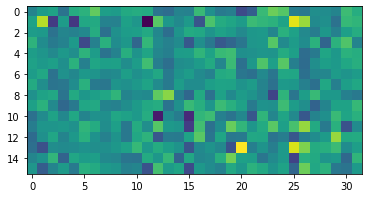

In [16]:
print(kernel_images.shape)

plt.imshow(kernel_images[0][0])

In [17]:
for dp in test_data:
    print(dp[1])

0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0


In [18]:

datapoint = test_data[len(test_data)-4]

img_data = np.asarray([dh.load_image(datapoint[0], resize=True, add_noise=True, randomly_rotate=True, grayscale=True)]).astype('uint8')

print("datapoint label: ", datapoint[1])
print("model prediction: ", model.predict(img_data))

all_layer_outputs = model.predict(img_data)

datapoint label:  0.0
model prediction:  [[0.00041517]]


In [19]:

for l in inception_layer.layers[2:]:
    if 'conv' in l.name:
        print(l.output) 


NameError: name 'inception_layer' is not defined

In [ ]:
layer_0_conv_out = all_layer_outputs[93][0]
layer_0_conv_out.shape
plt.imshow(layer_0_conv_out[:,:,0])